In [21]:
import pygeoinf as pgf
import numpy as np
import matplotlib.pyplot as plt

In [22]:
M = pgf.EuclideanSpace(2)
D = pgf.EuclideanSpace(1)
P = pgf.EuclideanSpace(1)

G = pgf.LinearOperator(M, D, lambda x: 2*x[0])
T = pgf.LinearOperator(M, P, lambda x: 3*x[1])

data_noise_set = pgf.subsets.Ball(D, center=D.zero, radius=1.0, open_set=False)
observed_data = np.asarray([1.0])
shape_matrix = pgf.MatrixLinearOperator(M, M, np.asarray([[1.0, 0.0], [0.0, 1.0]]))
inverse_shape_matrix_factor = pgf.MatrixLinearOperator(M, M, np.asarray([[1 / np.sqrt(2.0), 0.0], [0.0, 1.0]]))
model_confidence_set = pgf.subsets.Ellipsoid(M, center=M.zero, radius=1.0,
                                             operator=shape_matrix,
                                             inverse_sqrt_operator=inverse_shape_matrix_factor)

/tmp/ipykernel_85259/2367066276.py:1: UserWarning: Constructing a subspace from a tangent basis without a solver. This defines an implicit constraint with a singular operator. Bayesian conditioning will fail; geometric projection remains available.
  line = pgf.subspaces.AffineSubspace.from_tangent_basis(D, [D.basis_vector(0)], D.zero)


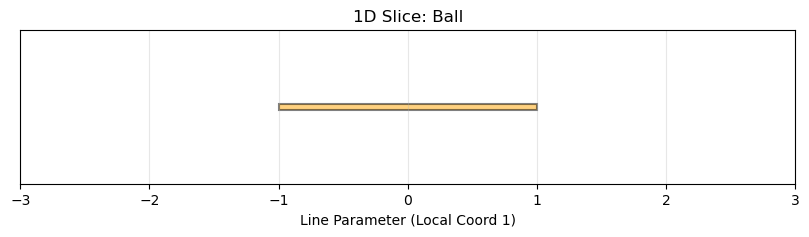

Plotted data feasible subset


In [23]:
line = pgf.subspaces.AffineSubspace.from_tangent_basis(D, [D.basis_vector(0)], D.zero)
plotter = pgf.SubspaceSlicePlotter(data_noise_set, line, grid_size=100)
plotter.plot(bounds=(-3, 3), color="orange", show_plot=True)
print("Plotted data feasible subset")


/tmp/ipykernel_85259/113924549.py:1: UserWarning: Constructing a subspace from a tangent basis without a solver. This defines an implicit constraint with a singular operator. Bayesian conditioning will fail; geometric projection remains available.
  surface = pgf.subspaces.AffineSubspace.from_tangent_basis(M, [M.basis_vector(0), M.basis_vector(1)], M.zero)


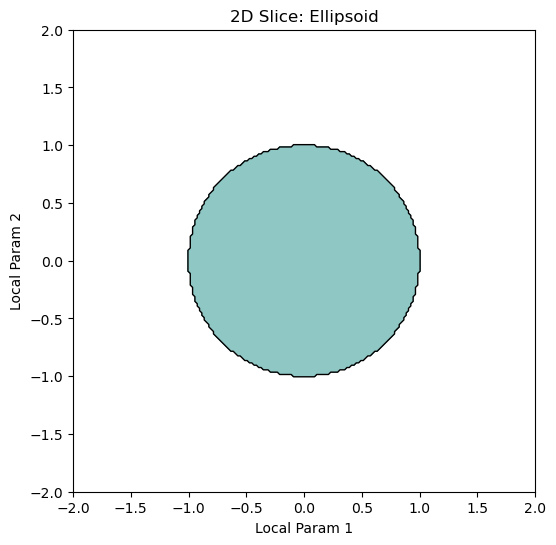

Plotted model feasible subset


In [24]:
surface = pgf.subspaces.AffineSubspace.from_tangent_basis(M, [M.basis_vector(0), M.basis_vector(1)], M.zero)
plotter_2d = pgf.SubspaceSlicePlotter(model_confidence_set, surface, grid_size=200)
plotter_2d.plot(bounds=((-2, 2), (-2, 2)), cmap="viridis", show_plot=True)
print("Plotted model feasible subset")

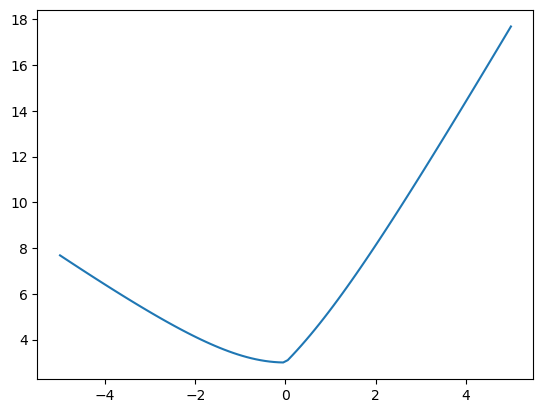

In [25]:
cost_function = pgf.backus_gilbert.DualMasterCostFunction(D, P, M, G, T,
                                                          model_confidence_set.support_function,
                                                          data_noise_set.support_function,
                                                          observed_data,
                                                          q_direction=P.basis_vector(0))

lambdas = np.linspace(-5.0, 5.0, 100)
cost_function_values = [cost_function(lmbd) for lmbd in lambdas]
plt.plot(lambdas, cost_function_values)
plt.show()


In [26]:
property_direction_1 = P.basis_vector(0)
result_1 = pgf.convex_optimisation.SubgradientDescent(cost_function, step_size=0.01, max_iterations=10000).solve(property_direction_1)
property_direction_2 = -property_direction_1
result_2 = pgf.convex_optimisation.SubgradientDescent(cost_function, step_size=0.01, max_iterations=10000).solve(property_direction_2)
print(f"Optimal value in direction {property_direction_1}: {result_1.f_best}")
print(f"Optimal value in direction {property_direction_2}: {result_2.f_best}")
solution_half_space_1 = pgf.subsets.HalfSpace(P, property_direction_1, result_1.f_best)
solution_half_space_2 = pgf.subsets.HalfSpace(P, property_direction_2, result_2.f_best)
solution_set = pgf.subsets.PolyhedralSet(P, [solution_half_space_1, solution_half_space_2])

Optimal value in direction [1.]: 3.000000000000329
Optimal value in direction [-1.]: 3.00000000000033


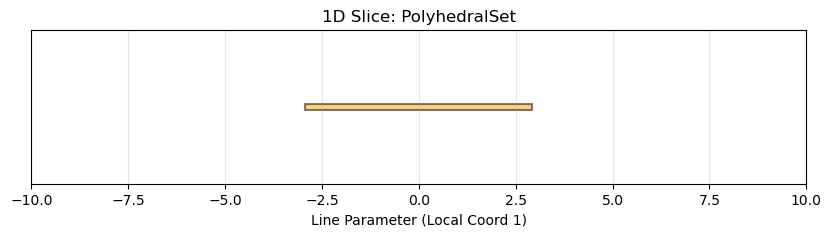

Plotted data feasible subset


In [27]:
plotter_solution = pgf.SubspaceSlicePlotter(solution_set, line, grid_size=100)
plotter_solution.plot(bounds=(-10, 10), color="orange", show_plot=True)
print("Plotted data feasible subset")
